In [1]:
from tsp_annealing import *
import matplotlib.pyplot as plt

Best tour: [17 13 23 42  6 25  7 30 27 21  2 35 34 19  1 45 50 46 16 36 14 44 32 38
  9 48 43 41 18 39 40 12 24  5 22 47 26  0 31 10 49  8 29 33 20 28 15 37
  4 11  3]
Best distance: 496.2119924869911


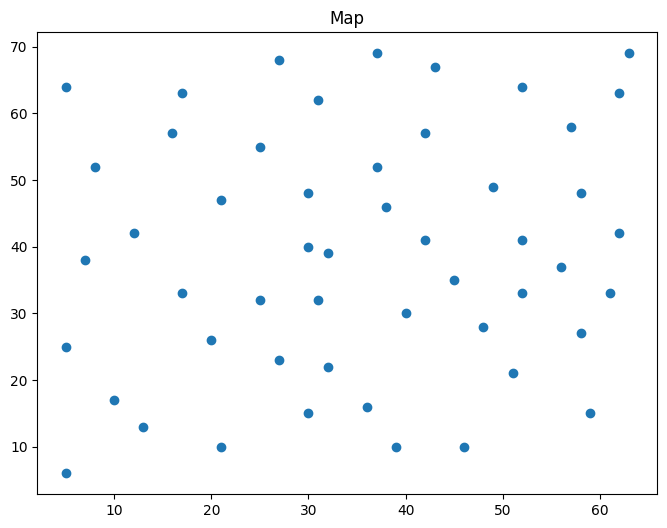

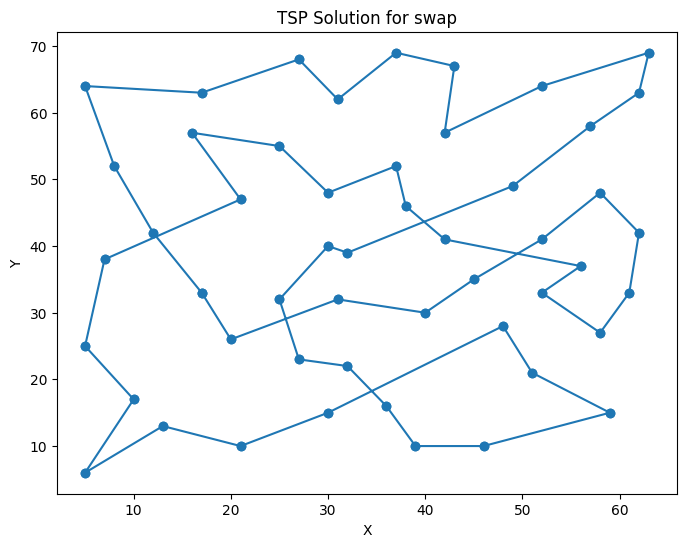

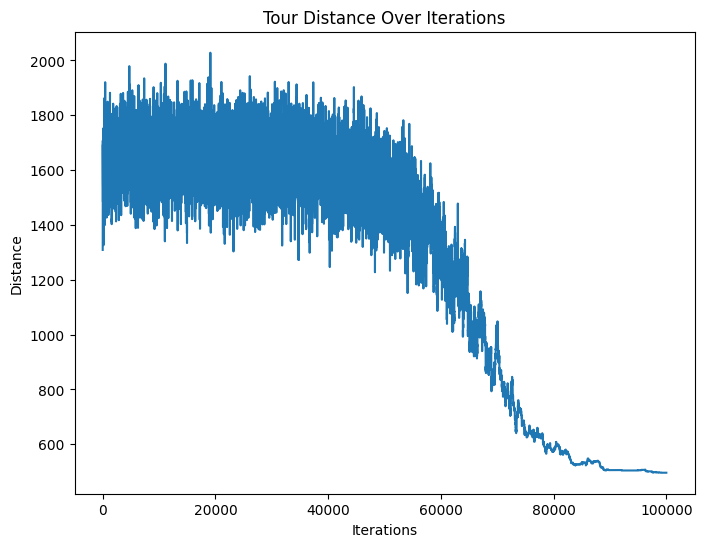

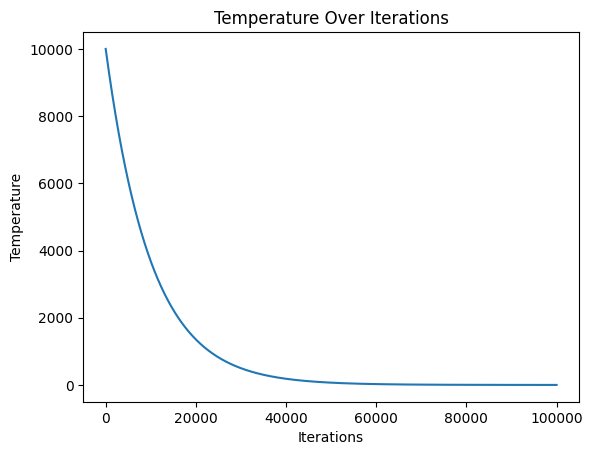

Best tour: [39 18 41 16 36 43 14 44 32 38  9 48  8 29 33 49 15 20 28  1 19 34 35  2
 27 21  0 31 10 37  4 11 50 45 26  5 47  7 30 25  6 22 42 23 13 24 17 46
  3 12 40]
Best distance: 446.00407000818063


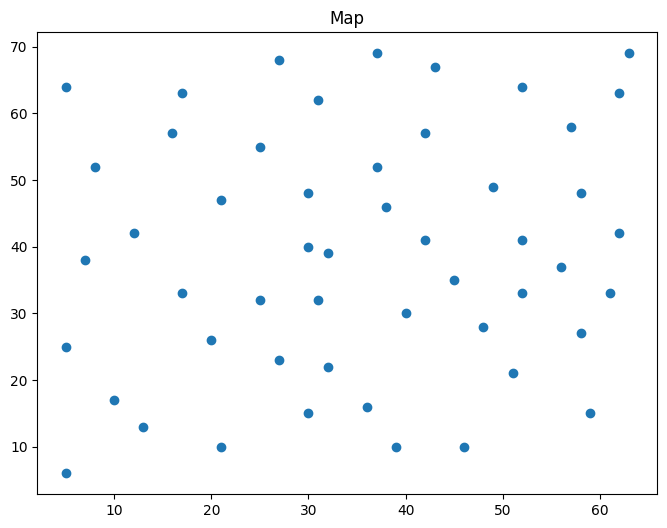

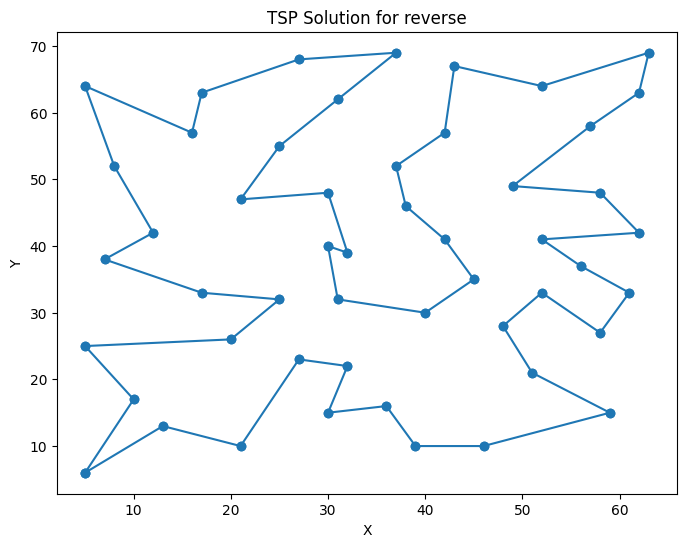

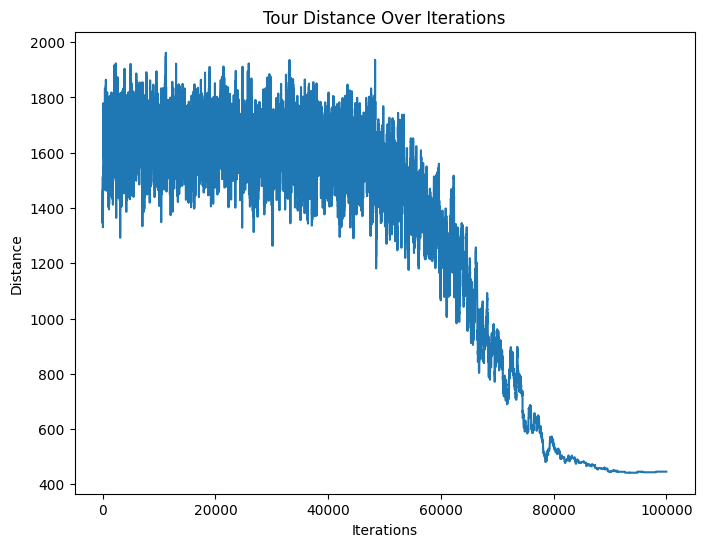

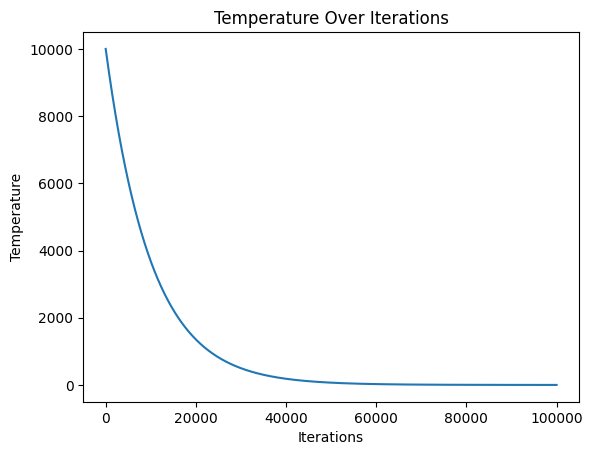

In [3]:
def plot_TSP_solution(cities, permutation_method):
    plt.figure(figsize=(8, 6))
    plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
    plt.title('Map')

    distances = calculate_distances(cities)

    best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, altering_method=permutation_method, max_iterations=int(1E5), alpha=0.9999)

    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    plot_tour(best_tour, cities, permutation_method)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(cost_over_iterations)
    plt.title('Tour Distance Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    plt.show()

    plt.plot(temperature_over_interations)
    plt.title('Temperature Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')

    plt.show()

def best_distance(cities, permutation_method):
    distances = calculate_distances(cities)

    best_tour, best_tour_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, altering_method=permutation_method, max_iterations=int(1E5), alpha=0.9999)

    print("Best tour:", best_tour)
    print("Best distance:", best_tour_distance)



cities = load_graph('TSP-Configurations/eil51.tsp.txt')
plot_TSP_solution(cities, 'swap')
plot_TSP_solution(cities, 'reverse')





Best tour: [211 205 213 212 218 221 220 202 142 122  38  36  35  31  12 273 275   4
   6   5 274 262 263 256 252 225 226 227 228 238 245 244 243 246 250 209
 206 203 141 139 146 176 180 174 159 158 160 172 100 168 188 185 197 201
 210 208 251 207 261 268 134 135 136 138 183 101  92  97  83  84  40 131
 132  17  18  16  15  23 121 118 156 117 116 161 184 186 187 164 163 162
  46  47  50  51  52  53  55  63 102 169 166 171 170 104 103 109  86  70
  69 113 157 175 178 147 148 149 155 152 153 126  25  21  26 125  29  33
  34  32  30  28  27  24  22 127  41  44  43 106 105  90  91 196 195 194
 230 239 240 236 234 233 229 257 258 267 266 264 217 223 224 232 235 222
 190 165 167  99  98  87  71  72  82  81  93  96  95  94  77  80 173 150
 177 265 137 151 115 114  85  88  89  79  75  73  74  76  78  66  58  59
 123 130  19  20 154 119  60  61 110 108 107 111 112  64  65  68  67  48
  49  37  39 124 269 270 271 254 253 204 145 143 199 198 179 181 182 191
 193 231 237 249 247 248   3 276 277 259

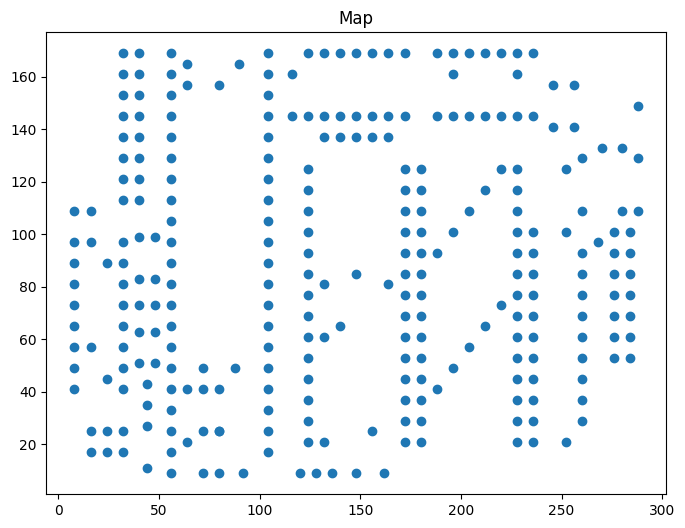

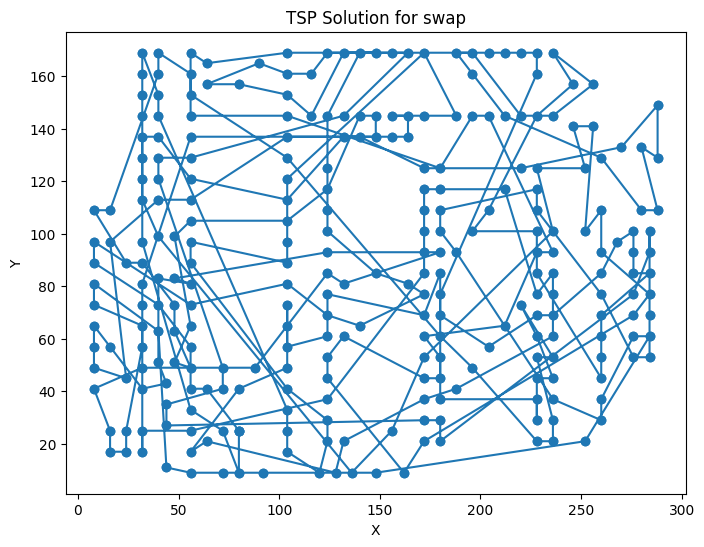

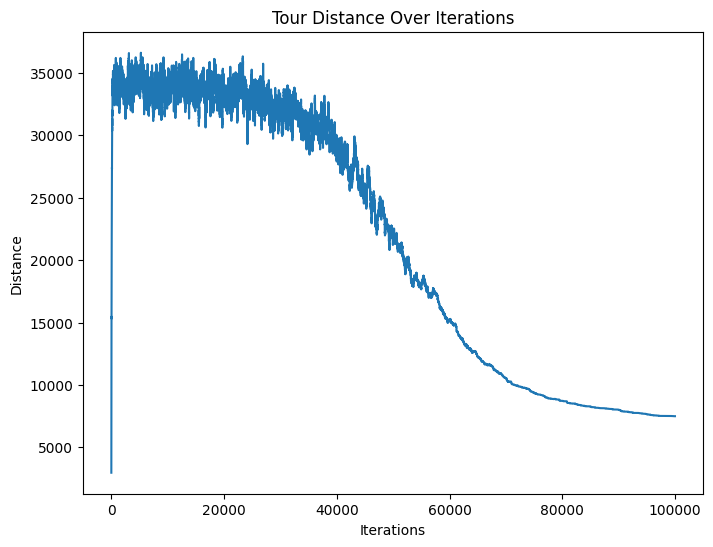

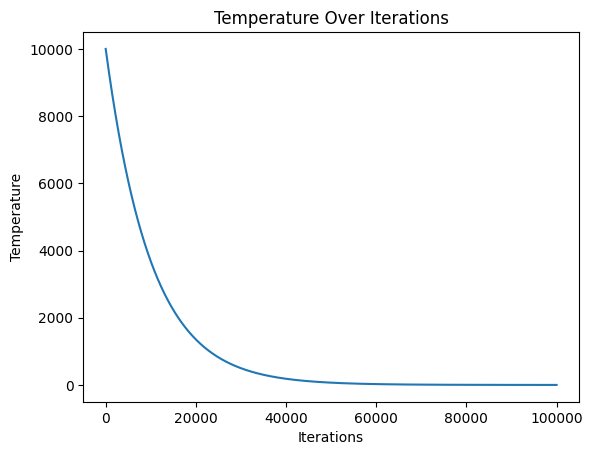

Best tour: [216 215 212 213 225 224 226 209 208 252 207 205 204 222 218 223 234 235
 231 228 250 245 230 233 227 232 236 237 244 238 239 240   1 242 246 249
 243 241 279   0   3   5 275   8   9  11  10 270  15  13  12  22  23  24
  21  19 131 132  16  17  14   7   6   4 276   2 278 277 273 274 272 271
 262 261 257 260 259 258 248 247 256 255 253 254 251 229 210 211 206 264
 139 140 145 144 199 202 201 195 190 191 196 193 194 200 198 197 192 189
 182 183 162 161 160 163 164 165 187 188 186 185 184 179 175 181 180 176
 150 137 138 148 149 178 177 156 151 155 152 154 121 122 123 124  40  38
  35  36  31  26  27  28  30  29  33  32  37  34  39  47  48  51  52  49
  50  53  46  54  55  56  57  62  61  60  59  42  41  45  44  43  58  68
  67  69  65  63  66  70  71  72  74  76  73  75  81  80  77  93  92  96
  97  95  94  78  79 101 102 104 103  89  90  91 100  98  99 167 166 168
 169 170 171 105 106 173 172 107 108  87 112 113 110 109 111  88  82  83
  86  84  64  85 115 116 117 114 159 174

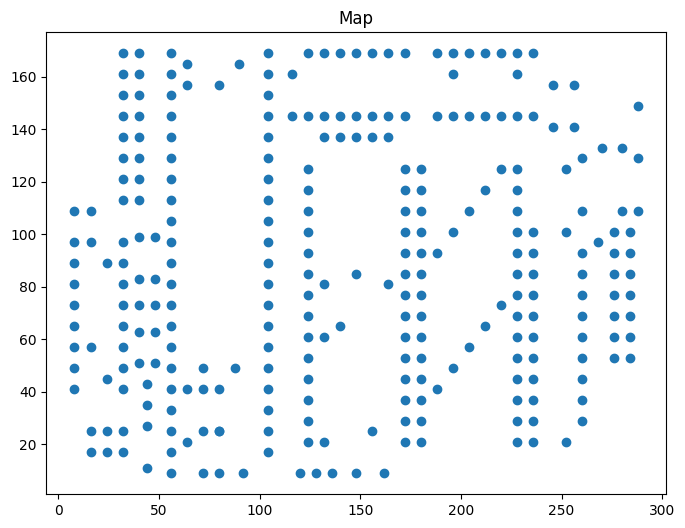

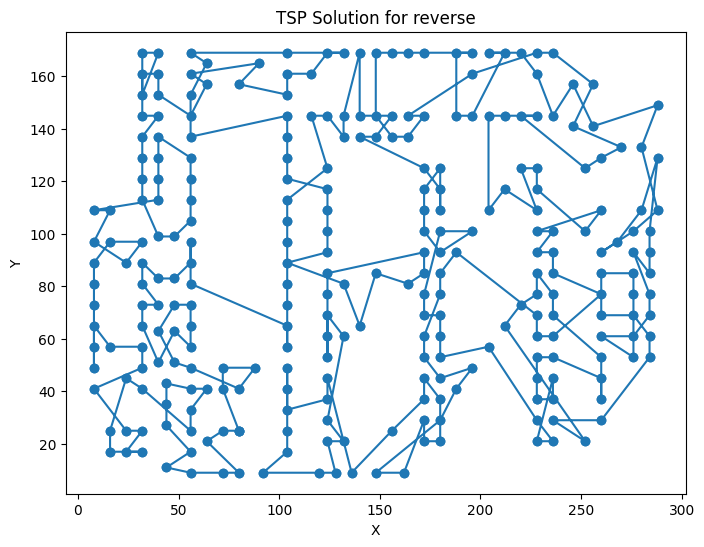

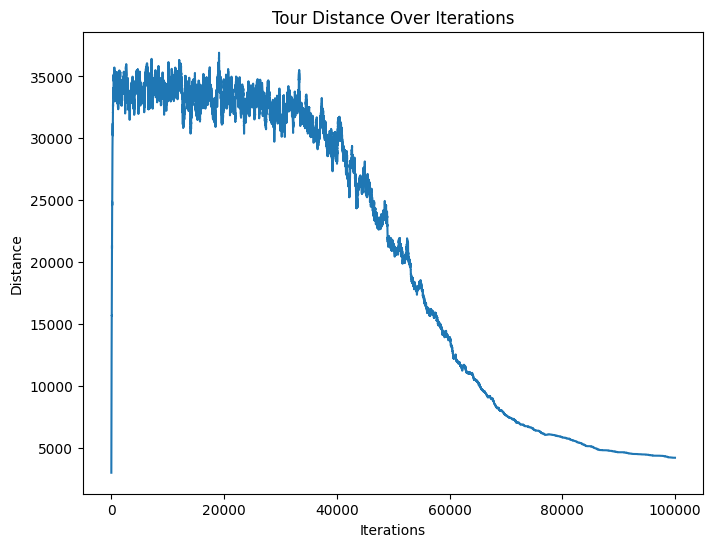

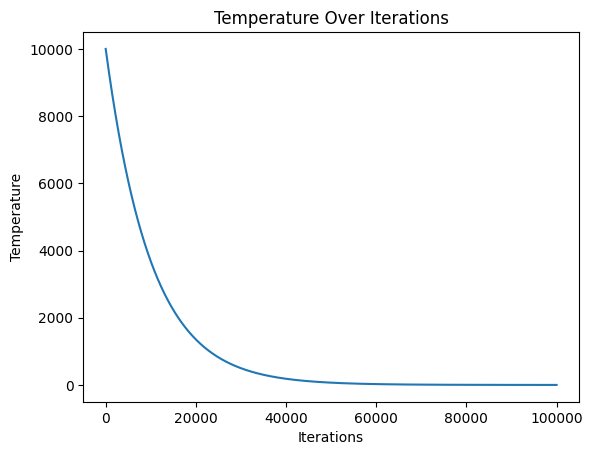

In [5]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')
plot_TSP_solution(cities, 'swap')
plot_TSP_solution(cities, 'reverse')

In [ ]:
cities = load_graph('TSP-Configurations/pcb442.tsp.txt')
plot_TSP_solution(cities, 'swap')
plot_TSP_solution(cities, 'reverse')

In [ ]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
distances = calculate_distances(cities)

num_runs = 50
run_simulations(num_runs=num_runs, distances=distances, output='fitness_statistics')

In [ ]:
max_iterations_list = range(100, 20000, 1000)

means, stds, conf_intervals = run_vary_maxiter(num_runs, distances, max_iterations_list)


In [ ]:
means = np.array(means)
lower_bounds = np.array([interval[0] for interval in conf_intervals])
upper_bounds = np.array([interval[1] for interval in conf_intervals])

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, means, marker='o', linestyle='-', color='blue', label='Means')
plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.2, color='blue')


plt.title('Means over Number of Max Iterations with Confidence Interval')
plt.xlabel('Max Iterations')
plt.ylabel('Means')
plt.legend()

plt.show()